In [1]:
import pandas as pd
from matplotlib import dates as mpl_date
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Disk.csv")

In [4]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [5]:
df.describe()

,Time_Elapsed,Disk_Precentage
count,256901.000000,256901.000000
mean,12961.518333,58.784063
std,7481.963909,8.134465
min,0.000093,34.800000
25%,6483.000504,53.800000
50%,12960.399657,59.600000
75%,19441.463483,65.600000
max,25921.242811,70.600000


In [6]:
dfH = []
dfm = []
dfs = []
for index, row in df.iterrows():
    timestamp = row['Time']
    H,m,s = timestamp.split(':')
    dfH.append(H)
    dfm.append(m)
    dfs.append(s)

df['H'] = dfH
df['m'] = dfm
df['s'] = dfs

print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Time,Time_Elapsed,Disk_Precentage,H,m,s
0,04:18:35,0.000093,34.8,04,18,35
1,04:18:35,0.100363,34.8,04,18,35
2,04:18:35,0.201091,34.8,04,18,35
3,04:18:35,0.301506,34.8,04,18,35
4,04:18:36,0.402026,34.8,04,18,36


In [7]:
Time = []
for index, row in df.iterrows():
    Time.append(row['H']+':'+row['m']+':'+row['s'])

newDF = pd.DataFrame()
newDF['Time'] = Time
newDF['Disk_Precentage'] = df['Disk_Precentage']
newDF['Time'] = pd.to_datetime(newDF['Time'])
newDF


<ipython-input-7-be1d9999c7ad>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  newDF['Time'] = pd.to_datetime(newDF['Time'])


,Time,Disk_Precentage
0,2024-06-22 04:18:35,34.8
1,2024-06-22 04:18:35,34.8
2,2024-06-22 04:18:35,34.8
3,2024-06-22 04:18:35,34.8
4,2024-06-22 04:18:36,34.8
...,...,...
256896,2024-06-22 11:30:36,70.6
256897,2024-06-22 11:30:36,70.6
256898,2024-06-22 11:30:36,70.6
256899,2024-06-22 11:30:36,70.6


In [8]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=d5965191722a6c047390d8e554609cb40af4c9ed3b2f00a09607b81ab9e1e4cd
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [9]:
from pandasql import sqldf
sql = lambda q: sqldf(q, globals())
newDF = sqldf("SELECT * FROM newDF WHERE Time BETWEEN '2024-06-22 04:18:35' AND '2024-06-22 04:19:35'")
newDF

,Time,Disk_Precentage
0,2024-06-22 04:18:35.000000,34.8
1,2024-06-22 04:18:35.000000,34.8
2,2024-06-22 04:18:35.000000,34.8
3,2024-06-22 04:18:35.000000,34.8
4,2024-06-22 04:18:36.000000,34.8
...,...,...
582,2024-06-22 04:19:34.000000,35.1
583,2024-06-22 04:19:34.000000,35.1
584,2024-06-22 04:19:34.000000,35.1
585,2024-06-22 04:19:34.000000,35.1


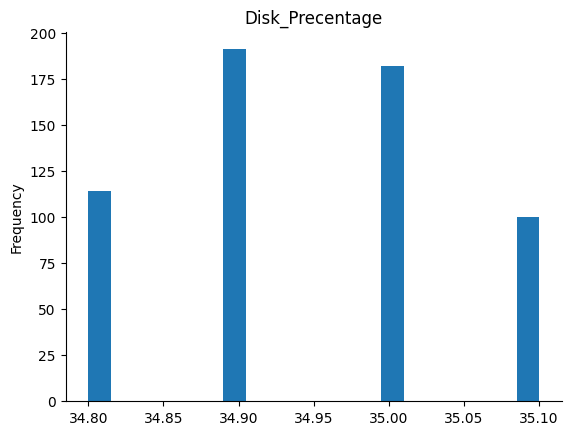

In [17]:
# @title Disk_Precentage

from matplotlib import pyplot as plt
newDF['Disk_Precentage'].plot(kind='hist', bins=20, title='Disk_Precentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

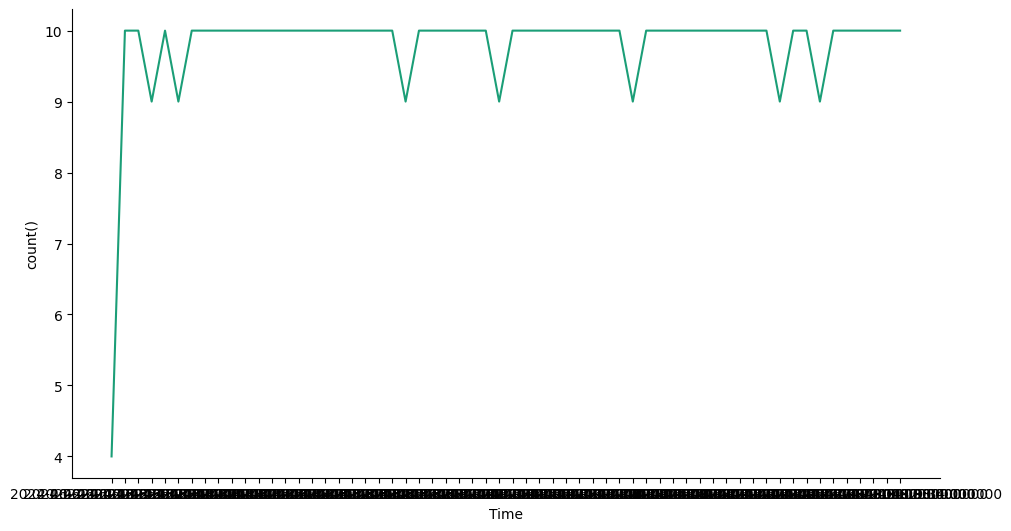

In [14]:
# @title Time vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time'}, axis=1)
              .sort_values('Time', ascending=True))
  xs = counted['Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = newDF.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('count()')

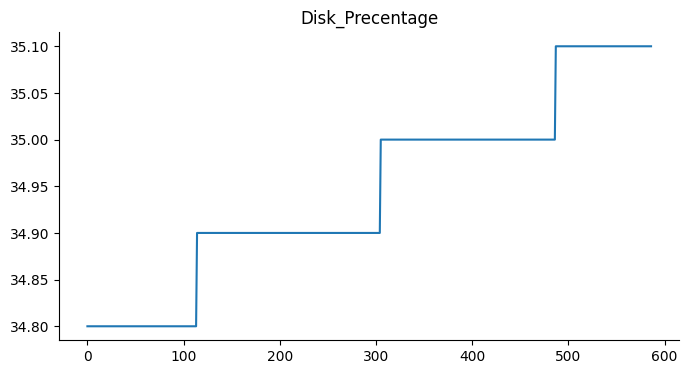

In [16]:
# @title Disk_Precentage

from matplotlib import pyplot as plt
newDF['Disk_Precentage'].plot(kind='line', figsize=(8, 4), title='Disk_Precentage')
plt.gca().spines[['top', 'right']].set_visible(False)

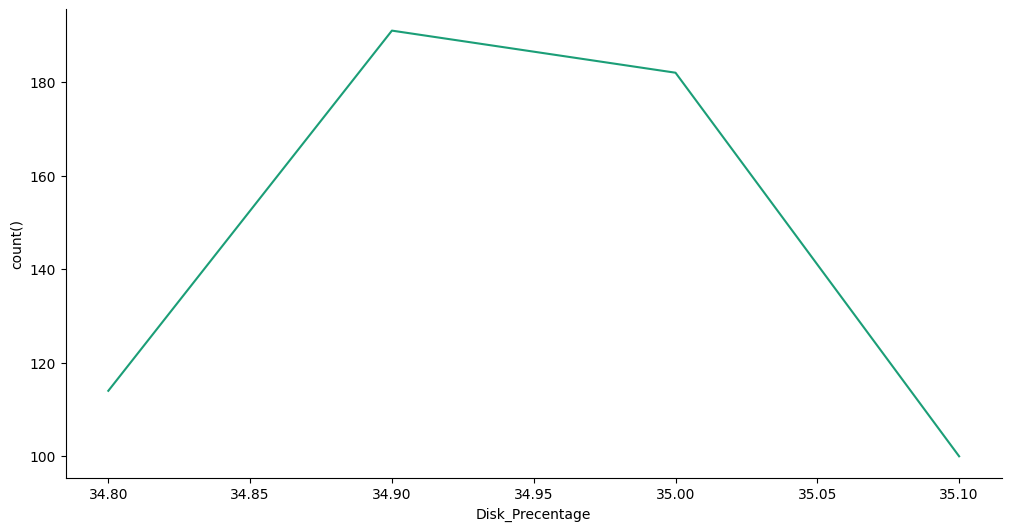

In [15]:
# @title Disk_Precentage vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Disk_Precentage']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Disk_Precentage'}, axis=1)
              .sort_values('Disk_Precentage', ascending=True))
  xs = counted['Disk_Precentage']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = newDF.sort_values('Disk_Precentage', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Disk_Precentage')
_ = plt.ylabel('count()')